In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
colors = {'blue': '#729ECE',
          'brown': '#A8786E',
          'green': '#67BF5C',
          'grey': '#A2A2A2',
          'orange': '#FF9E4A',
          'pink': '#ED97CA',
          'purple': '#AD8BC9',
          'red': '#ED665D',
          'teal': '#6DCCDA',
          'yellow': '#CDCC5D'}

In [3]:
dog_friendliness = np.random.random(size=100)*10.
cat_friendliness = np.random.random(size=100)*10.

In [4]:
dog_friendliness


array([ 0.14497337,  9.26523319,  6.7240495 ,  6.21152526,  9.09472354,
        2.97663956,  0.43335316,  0.32208391,  6.62590076,  3.73714141,
        2.66587217,  2.25475917,  6.03137434,  4.46608737,  1.97141858,
        9.38966955,  5.03176453,  9.54539343,  2.12529891,  2.17128751,
        0.82251822,  2.68099067,  7.54675042,  0.65800879,  0.32775532,
        5.52375134,  2.16631815,  7.43901172,  5.08191266,  4.70482616,
        2.55994825,  4.0620186 ,  6.99867744,  2.72748122,  1.87115203,
        1.34883115,  7.30120605,  1.6797222 ,  0.84405538,  3.35692342,
        3.879767  ,  5.5070654 ,  3.24394359,  8.20101438,  7.2081667 ,
        6.35533213,  3.2368334 ,  5.65432834,  2.47842659,  5.26526811,
        9.74145526,  9.01341396,  9.88522124,  0.22976753,  0.07426616,
        5.51892548,  4.3807863 ,  2.32211299,  1.33358224,  0.82509884,
        5.61130792,  2.62532329,  5.01170191,  8.65778829,  3.82698105,
        9.71811181,  0.32075755,  4.1725058 ,  4.26057159,  8.88

In [5]:
r = (np.random.random(size=len(dog_friendliness))*0.3)+0.7

def separator(x, separation=0.01, way=1):
    if way == 1:
        diffs = 10.-x
    elif way == -1:
        diffs = x
    diffs = r*(diffs*separation)
    return x + (way*diffs)
    


In [6]:
dog_seps = {}
cat_seps = {}

for s in range(0,100):
    s_ = s/100.
    dog_seps[s] = separator(dog_friendliness, separation=s_)
    cat_seps[s] = separator(cat_friendliness, separation=s_, way=-1)

In [7]:
max_sep = 0
for s in range(0,100):
    min_dog = np.min(dog_seps[s])
    max_cat = np.max(cat_seps[s])
    print s, min_dog, max_cat
    
    if min_dog < max_cat:
        max_sep = s
        
print max_sep

0 0.0742661562909 9.8949266606
1 0.150197950706 9.81012900673
2 0.226129745121 9.72533135285
3 0.302061539537 9.64053369897
4 0.377993333952 9.5557360451
5 0.453925128367 9.47093839122
6 0.529856922783 9.38614073735
7 0.605788717198 9.30134308347
8 0.681720511613 9.21654542959
9 0.757652306028 9.13174777572
10 0.833584100444 9.04695012184
11 0.909515894859 8.96215246796
12 0.985447689274 8.87735481409
13 1.06137948369 8.79255716021
14 1.1373112781 8.70775950633
15 1.21324307252 8.62296185246
16 1.28917486694 8.53816419858
17 1.36510666135 8.45717754181
18 1.44103845577 8.38488776871
19 1.51697025018 8.3125979956
20 1.5929020446 8.24030822249
21 1.66883383901 8.16801844938
22 1.74476563343 8.09572867628
23 1.82069742784 8.02343890317
24 1.89662922226 7.95114913006
25 1.97256101667 7.87885935695
26 2.04849281109 7.80656958385
27 2.1244246055 7.73427981074
28 2.20035639992 7.66199003763
29 2.27628819433 7.58970026452
30 2.35221998875 7.51741049142
31 2.42815178316 7.44512071831
32 2.50408

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr_models = {}
fpr = {}
tpr = {}
aucs = {}

for s in range(max_sep+1):
    
    y = np.array(np.ones(100).tolist()+np.zeros(100).tolist())
    d = dog_seps[s].tolist()
    c = cat_seps[s].tolist()
    
    X = pd.DataFrame({'friendliness':d+c})[['friendliness']].values
    
    lr = LogisticRegression()
    lr.fit(X, y)
    lr_models[s] = lr
    
    yscore = lr.decision_function(X)
    
    fpr_, tpr_, _ = roc_curve(y, yscore)
    fpr[s] = fpr_
    tpr[s] = tpr_
    aucs[s] = auc(fpr_, tpr_)
    

In [9]:
def plot_roc(dog_seps, cat_seps, tpr, fpr, aucs, models, sep, pp_crit):
    
    ds = dog_seps[sep]
    cs = cat_seps[sep]
    mod = models[sep]
    
    fig, axarr = plt.subplots(1, 2, figsize=(18,7))
    
    ax = axarr[1]
    axr = axarr[0]
    

    # plot the logreg regression line for admit ~ gpa
    x_vals = np.linspace(-1.,12.,300)
    y_pp = mod.predict_proba(x_vals[:, np.newaxis])[:,1]
    
    pp_r = [np.floor(pp*100.) for pp in y_pp]
    pp_xs = {}
    for x_, p_ in zip(x_vals, pp_r):
        if p_ not in pp_xs.keys():
            pp_xs[p_] = x_
            
    sortedkeys = sorted(pp_xs.keys())
    if pp_crit < np.min(sortedkeys):
        pp_crit = np.min(sortedkeys)
    if pp_crit > np.max(sortedkeys):
        pp_crit = np.max(sortedkeys)

    ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

    # do one scatter plot for each type of wine:
    ax.scatter(ds,
               np.ones(100),
               c=colors['orange'], s=100, alpha=0.7,
               label='dog')

    ax.scatter(cs,
               np.zeros(100),
               c=colors['blue'], s=100, alpha=0.7,
               label='cat')

    ax.axvline(pp_xs[pp_crit], lw=3, color=colors['red'], ls='dashed',
               label='gpa where P(y = 1) = 0.5')
    
    
    ax.fill_between(x_vals[x_vals > pp_xs[pp_crit]], 0, 1, 
                           facecolor=colors['orange'], alpha=0.15)
    ax.fill_between(x_vals[x_vals < pp_xs[pp_crit]], 0, 1, 
                           facecolor=colors['blue'], alpha=0.15)

    ax.set_ylabel('dog vs. cat', fontsize=16)
    ax.set_xlabel('friendliness', fontsize=16)
    ax.set_title('dog vs. cat by friendliness\n', fontsize=20)

    ax.set_xlim([-0.5, 10.5])
    ax.set_ylim([-0.1, 1.1])
    
    ax.legend(loc='upper left')
    
    fpr_ = fpr[sep]
    tpr_ = tpr[sep]
    auc_ = aucs[sep]
    
    tpr_crit = np.sum([True for d_ in ds if d_ > pp_xs[pp_crit]])/100.
    fpr_crit = np.sum([True for c_ in cs if c_ > pp_xs[pp_crit]])/100.
    
    # Plot of a ROC curve for class 1 (has_cancer)
    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_, linewidth=4)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed', alpha=0.7, linewidth=4)
    axr.axvline(fpr_crit, lw=3, color=colors['red'], ls='dashed')
    axr.axhline(tpr_crit, lw=3, color=colors['red'], ls='dashed')
    axr.set_xlim([-0.02, 1.02])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('False positive rate', fontsize=16)
    axr.set_ylabel('True positive rate', fontsize=16)
    axr.set_title('Dog vs. Cat ROC curve\n', fontsize=20)
    axr.legend(loc="lower right")

    plt.show()

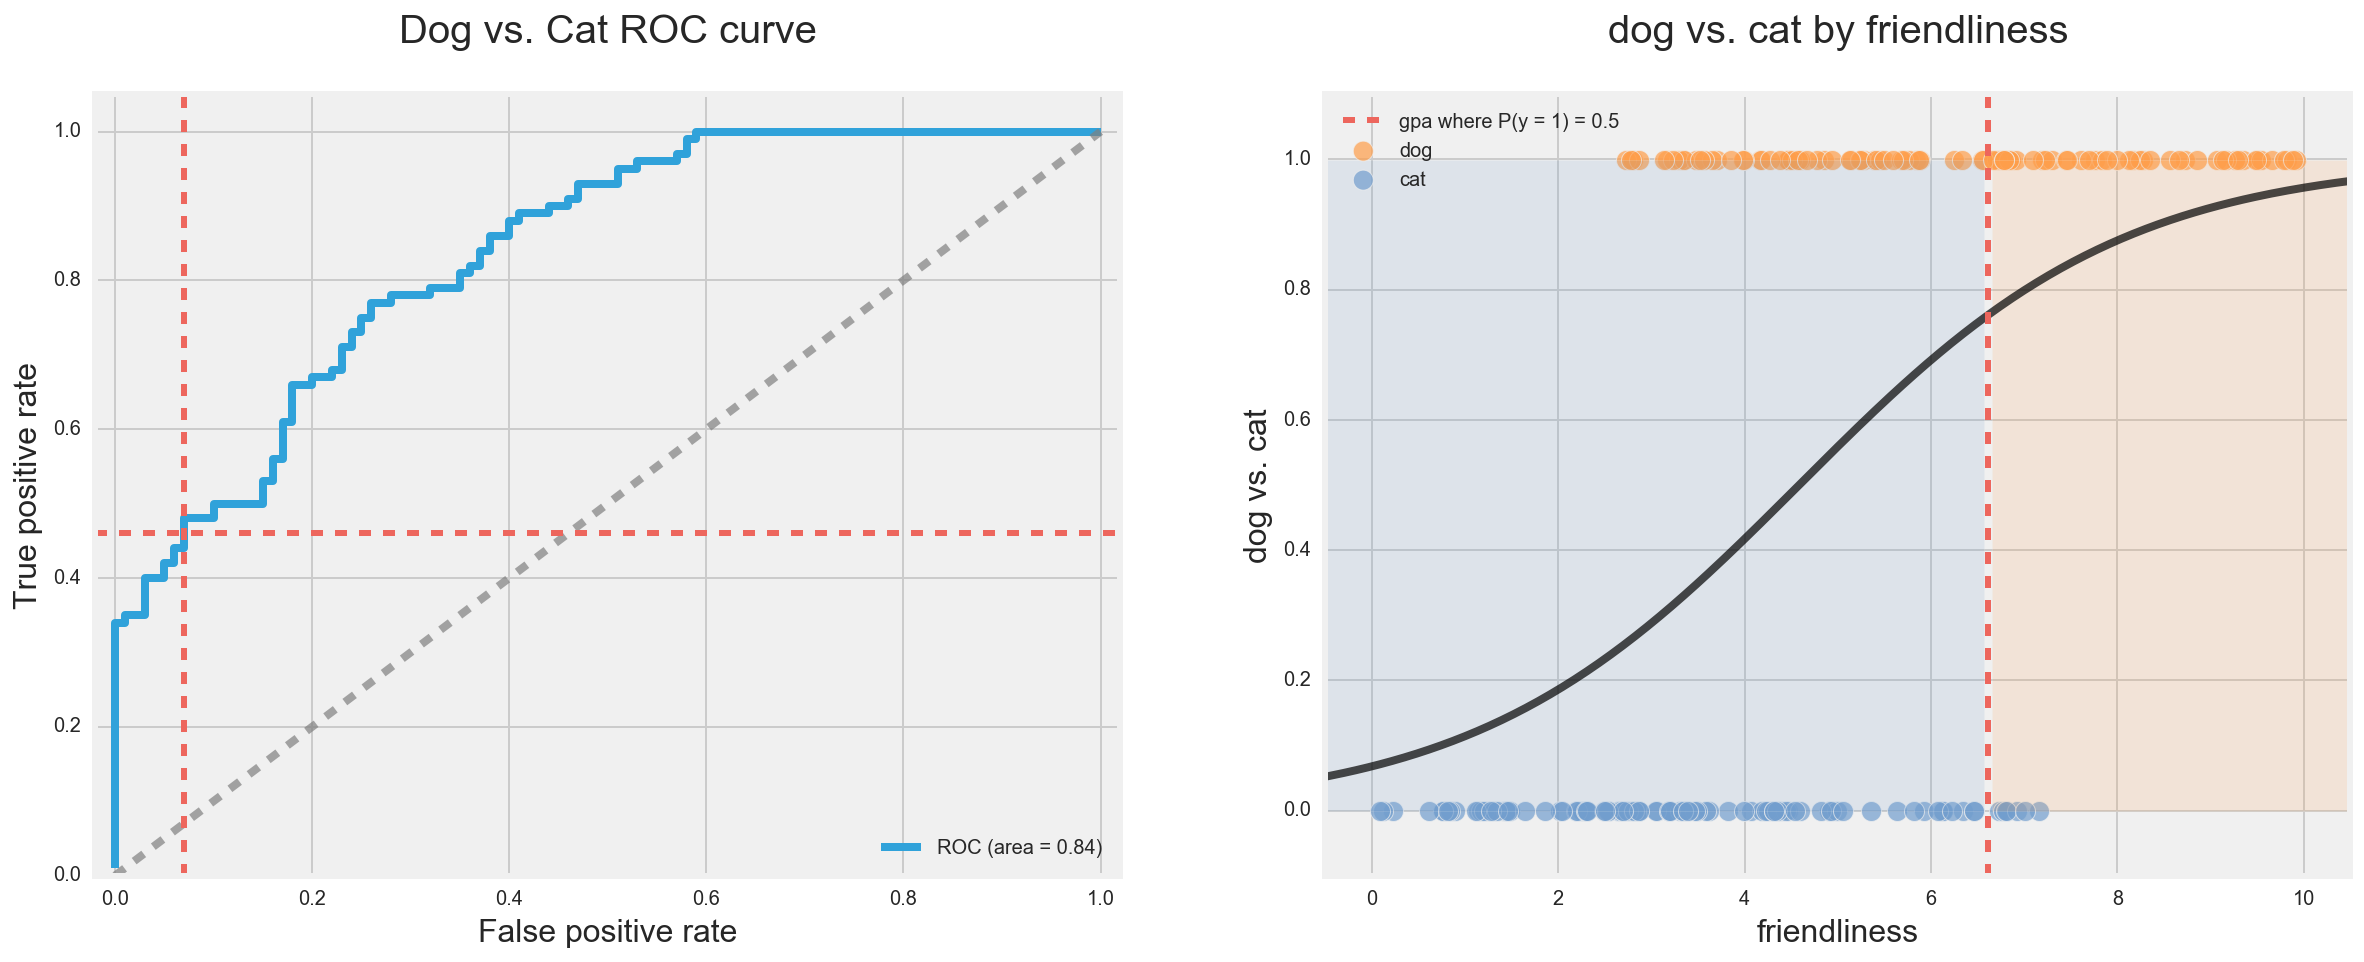

In [10]:
def plot_wrapper(separation=0, acceptance_criterion=0.05):
    plot_roc(dog_seps, cat_seps, tpr, fpr, aucs, lr_models, separation,
             int(acceptance_criterion*100))

interact(plot_wrapper, separation=widgets.IntSlider(min=0, max=max_sep, value=0, step=1),
         acceptance_criterion=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.50))